In [68]:
'''Want to examine inflation and other economic indicators via indexes'''
import scraper
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
itemPrices = scraper.loadItemPrices()
with open('Data/viableItems.pickle','rb') as f:
    viableItems = pickle.load(f)
with open('Data/itemCats.pickle','rb') as f:
    itemCats = pickle.load(f)

In [70]:
def averagePrices(items):
    minLen = items[0]
    prices = []
    for i in items:
        #print(len(itemPrices[i]))
        prices.append([a[1] for a in itemPrices[i]])
        if len(itemPrices[i])<len(itemPrices[minLen]):
            minLen = i
    minLen = len(itemPrices[minLen])
    print(minLen)
    priceAvg = []
    for i in range(minLen):
        priceAvg.append(0)
        for j in range(len(prices)):
            priceAvg[i]+=prices[j][i-minLen]
        priceAvg[i]/=len(prices)
    return priceAvg

1201


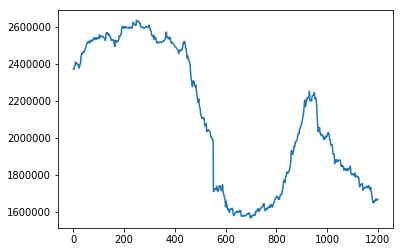

In [72]:
prices = averagePrices(viableItems)
plt.plot(prices)
plt.show()

In [84]:
def getItemsWithCats(items,cats,notCats=[]):
    cats = set(cats)
    notCats = set(notCats)
    matches = []
    for item in items:
        p = cats&set(itemCats[item])
        q = notCats&set(itemCats[item])
        if len(cats)==len(p) and len(q)==0:
            matches.append(item)
    return matches

def matchOne(items,cats,notCats=[]):
    cats = set(cats)
    notCats = set(notCats)
    matches = []
    for item in items:
        p = cats&set(itemCats[item])
        q = notCats&set(itemCats[item])
        if len(p)==1 and len(q)==0:
            matches.append(item)
    return matches

1496
1201


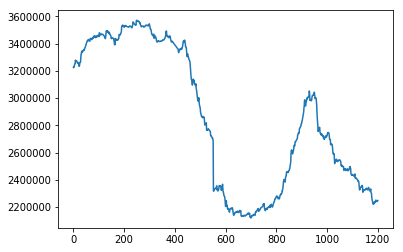

In [74]:
cats = ["Members' items"]
m = getItemsWithCats(viableItems,cats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

505
1207


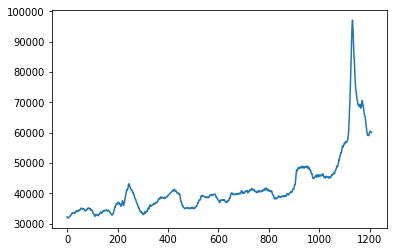

In [75]:
cats = ["Free-to-play items"]
notCats = ["Treasure Trails rewards"]
m = getItemsWithCats(viableItems,cats,notCats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

45
1261


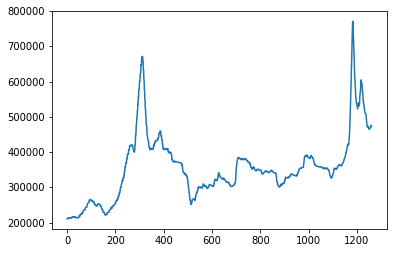

In [76]:
cats = ["Free-to-play items","Treasure Trails rewards"]
m = getItemsWithCats(viableItems,cats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

4 ['Oak_logs', 'Willow_logs', 'Logs', 'Yew_logs']
1316


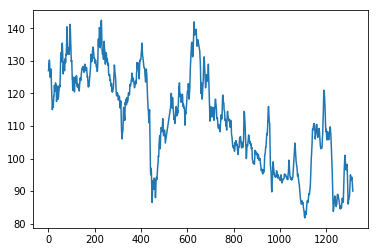

In [77]:
cats = ["Logs","Free-to-play items"]
m = getItemsWithCats(viableItems,cats)
print(len(m),m)
prices = averagePrices(m)
plt.plot(prices)
plt.show()

126
1214


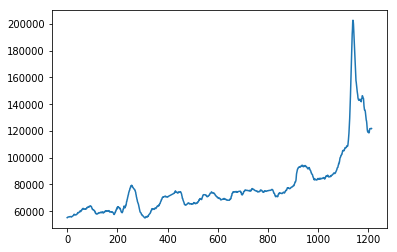

In [79]:
cats = ["Melee armour","Free-to-play items"]
m = getItemsWithCats(viableItems,cats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

71
1215


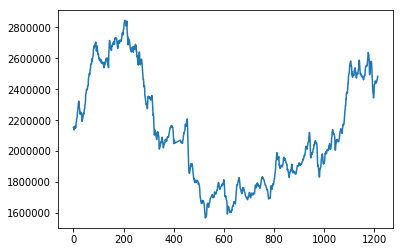

In [80]:
cats = ["Melee armour","Members' items"]
m = getItemsWithCats(viableItems,cats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

15
1270


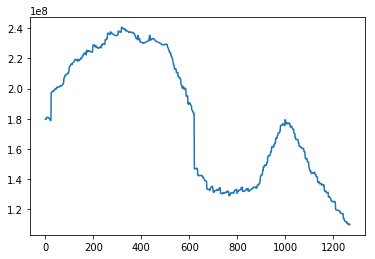

In [81]:
cats = ["3rd age equipment"]
m = getItemsWithCats(viableItems,cats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

72
1265


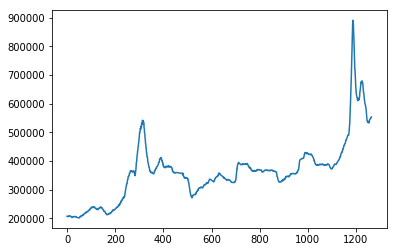

In [86]:
cats = ["Rune"]
notCats = ["Members' items"]
m = getItemsWithCats(viableItems,cats,notCats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()

117
1213


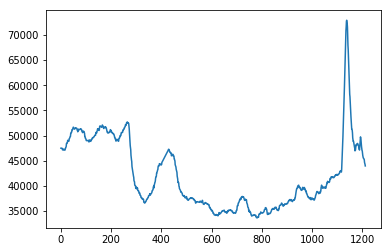

In [87]:
cats = ["Bronze","Iron","Steel","Mithril","Adamant"]
notCats = ["Members' items"]
m = matchOne(viableItems,cats,notCats)
print(len(m))
prices = averagePrices(m)
plt.plot(prices)
plt.show()